In [17]:
import numpy as np
import matplotlib as plt
import seaborn as sns

import rioxarray
import rasterio as rio
from rasterio.plot import show
from rasterio.windows import Window
import pandas as pd
import geopandas as gpd

In [21]:
from IPython.core.display import display

dataset = rio.open("Data/TIFFiles/DHMVIIDSMRAS1m_k13.tif")
print(dataset.count)
print(dataset.width)
print(dataset.height)
print(dataset.bounds)

1
32000
20000
BoundingBox(left=66000.0, bottom=198000.0, right=98000.0, top=218000.0)


(125, 125)


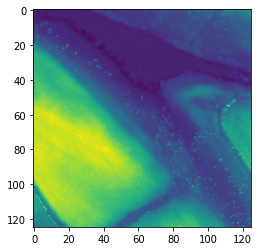

<AxesSubplot:>

In [29]:
w = dataset.read(1, window=Window(10000, 2500, 125, 125))
print(w.shape)
show(w)